In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def normalize_string_column_values(df, column_name):
    df[column_name] = df[column_name].str.upper()
    df[column_name] = df[column_name].str.strip()
    return df

#### Limpieza y creación de columnas útiles en `orders`

In [26]:
orders = pd.read_csv(
    'data/orders.csv',
    usecols=[
        'order_id',
        'customer_id',
        'status',
        'payment_method',
        'billing_address',
        'discount_amount',
        'order_date'
    ],
    dtype={
        'order_id': 'uint32',
        'customer_id': 'uint32',
        'discount_amount': 'float32',
        'status': 'category',
        'payment_method': 'category',
    },
)

In [27]:
orders = normalize_string_column_values(orders, 'status')
orders = normalize_string_column_values(orders, 'payment_method')
orders.fillna({"status":"UNDEFINED", "payment_method":"UNDEFINED"}, inplace=True)
orders['status'] = orders['status'].astype('category')
orders['payment_method'] = orders['payment_method'].astype('category')

In [28]:
orders["billing_address"] = orders["billing_address"].str.upper()
orders.fillna({"billing_address":"UNDEFINED"}, inplace=True)

pattern = r'([A-Z]{2})\s(\d{5})'
orders[["state", "zip_code"]] = orders["billing_address"].str.extract(pattern)
orders.state = orders.state.astype('category')
orders.zip_code = orders.zip_code.astype('UInt32')

In [29]:
orders["order_date"] = pd.to_datetime(orders["order_date"], format="%Y-%m-%dT%H:%M:%S.%f", errors="coerce")
orders["date"] = pd.DatetimeIndex(orders["order_date"]).date
orders["year_month"] = pd.DatetimeIndex(orders["order_date"]).strftime('%Y-%m')

#### Gráficos de distribución de órdenes en el tiempo y por Estado

Text(0, 0.5, 'Cantidad de órdenes')

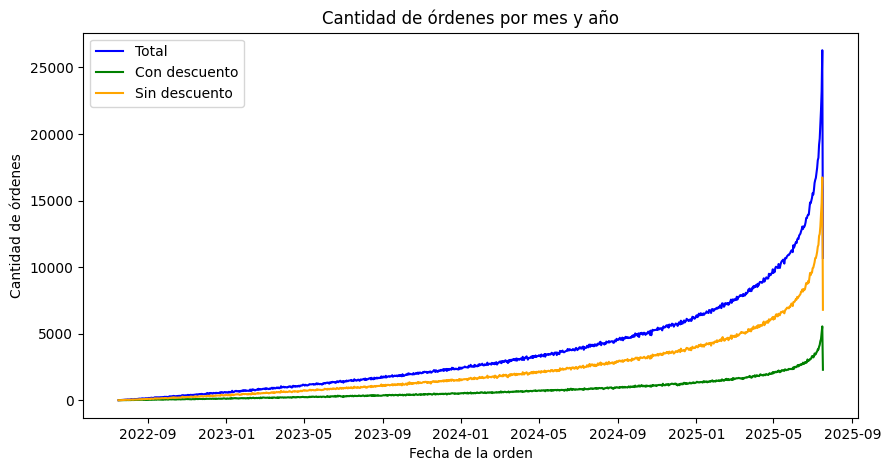

In [ ]:
import datetime

plt.figure(figsize=(10, 5))
plt.title("Cantidad de órdenes por mes y año")
limit_date = datetime.date(2025, 6, 1)
dates_filtered = orders.loc[orders.date <= limit_date][["date", "discount_amount"]]
sns.lineplot(
    data=dates_filtered["date"].value_counts().reset_index(), 
    x="date", y="count", color="blue", label="Total")
sns.lineplot(
    data=dates_filtered.loc[dates_filtered["discount_amount"] > 0]["date"].value_counts().reset_index(), 
    x="date", y="count", color="green", label="Con descuento")
sns.lineplot(
    data=dates_filtered.loc[dates_filtered["discount_amount"] == 0]["date"].value_counts().reset_index(), 
    x="date", y="count", color="orange", label="Sin descuento")
plt.xlabel("Fecha de la orden")
plt.ylabel("Cantidad de órdenes")

C:\Users\Patricio\AppData\Local\Temp\ipykernel_9236\2962429711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orders_per_state, x="state", y="count", palette="viridis")


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61],
 [Text(0, 0, 'AA'),
  Text(1, 0, 'AE'),
  Text(2, 0, 'AK'),
  Text(3, 0, 'AL'),
  Text(4, 0, 'AP'),
  Text(5, 0, 'AR'),
  Text(6, 0, 'AS'),
  Text(7, 0, 'AZ'),
  Text(8, 0, 'CA'),
  Text(9, 0, 'CO'),
  Text(10, 0, 'CT'),
  Text(11, 0, 'DC'),
  Text(12, 0, 'DE'),
  Text(13, 0, 'FL'),
  Text(14, 0, 'FM'),
  Text(15, 0, 'GA'),
  Text(16, 0, 'GU'),
  Text(17, 0, 'HI'),
  Text(18, 0, 'IA'),
  Text(19, 0, 'ID'),
  Text(20, 0, 'IL'),
  Text(21, 0, 'IN'),
  Text(22, 0, 'KS'),
  Text(23, 0, 'KY'),
  Text(24, 0, 'LA'),
  Text(25, 0, 'MA'),
  Text(26, 0, 'MD'),
  Text(27, 0, 'ME'),
  Text(28, 0, 'MH'),
  Text(29, 0, 'MI'),
  Text(30, 0, 'MN

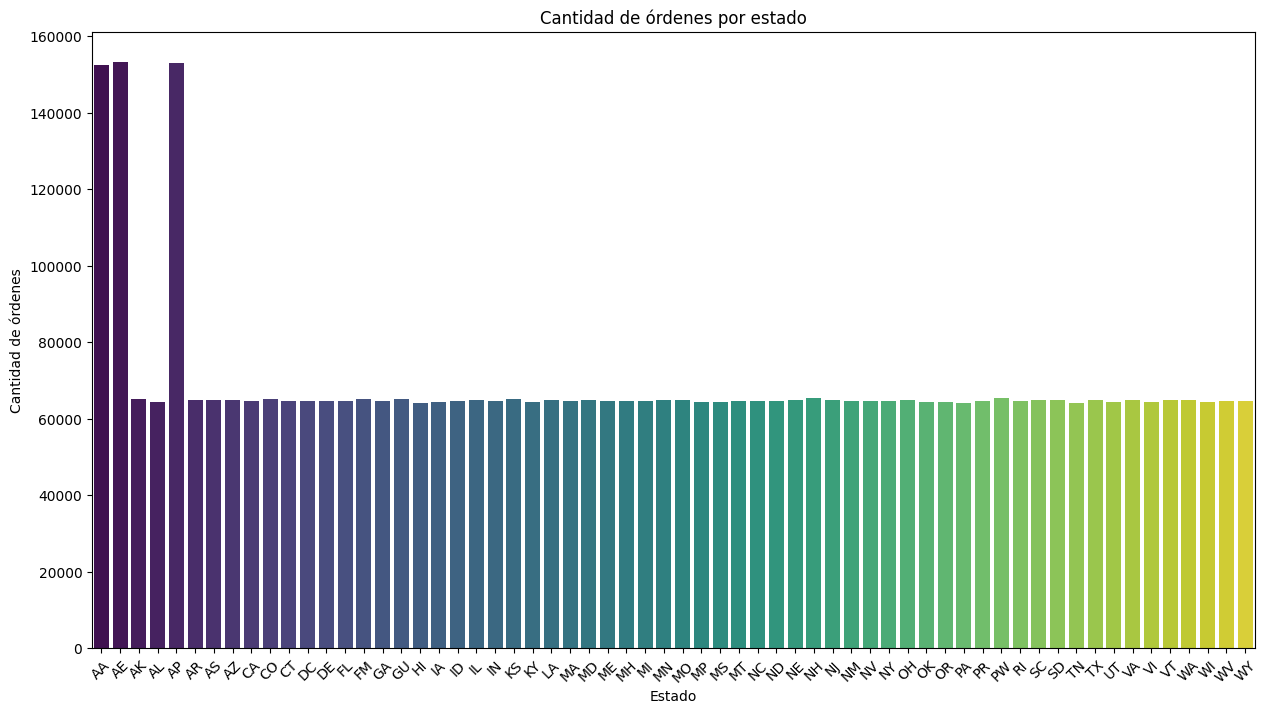

In [31]:
orders_per_state = orders["state"].value_counts().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data=orders_per_state, x="state", y="count", palette="viridis")
plt.title("Cantidad de órdenes por estado")
plt.xlabel("Estado")
plt.ylabel("Cantidad de órdenes")
plt.xticks(rotation=45)

C:\Users\Patricio\AppData\Local\Temp\ipykernel_9236\2209011103.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_per_state_year_month = orders.groupby(["state","year_month"]).size().reset_index().rename(columns={0: "count"})


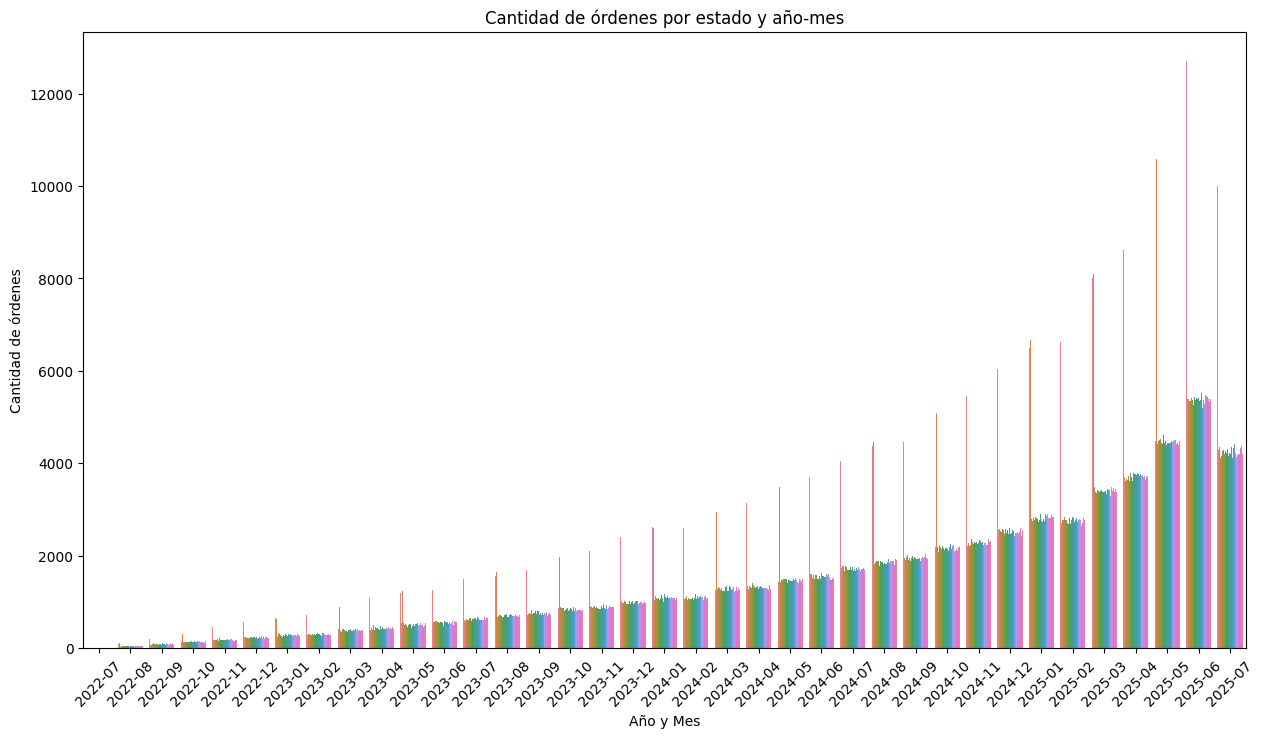

In [32]:
orders_per_state_year_month = orders.groupby(["state","year_month"]).size().reset_index().rename(columns={0: "count"})
plt.figure(figsize=(15, 8))
sns.barplot(data=orders_per_state_year_month, x="year_month", y="count", hue="state")
plt.title("Cantidad de órdenes por estado y año-mes")
plt.xlabel("Año y Mes")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de órdenes")
plt.legend([],[], frameon=False)

C:\Users\Patricio\AppData\Local\Temp\ipykernel_9236\435536365.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders_per_state_year_month = orders.groupby(["state","year_month"]).size().reset_index().rename(columns={0: "count"})


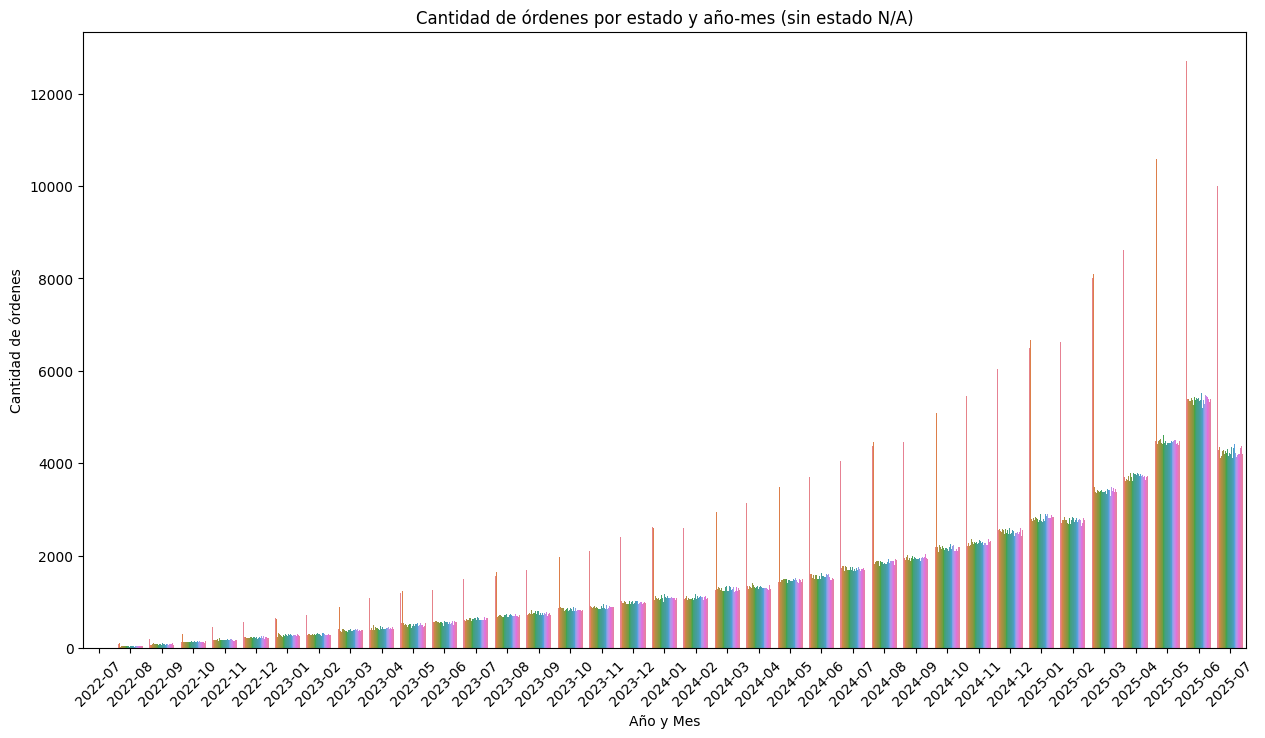

In [33]:
orders_per_state_year_month = orders.groupby(["state","year_month"]).size().reset_index().rename(columns={0: "count"})
plt.figure(figsize=(15, 8))
sns.barplot(data=orders_per_state_year_month.loc[orders_per_state_year_month["state"] != "N/A"], x="year_month", y="count", hue="state")
plt.title("Cantidad de órdenes por estado y año-mes (sin estado N/A)")
plt.xlabel("Año y Mes")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de órdenes")
plt.legend([],[], frameon=False)

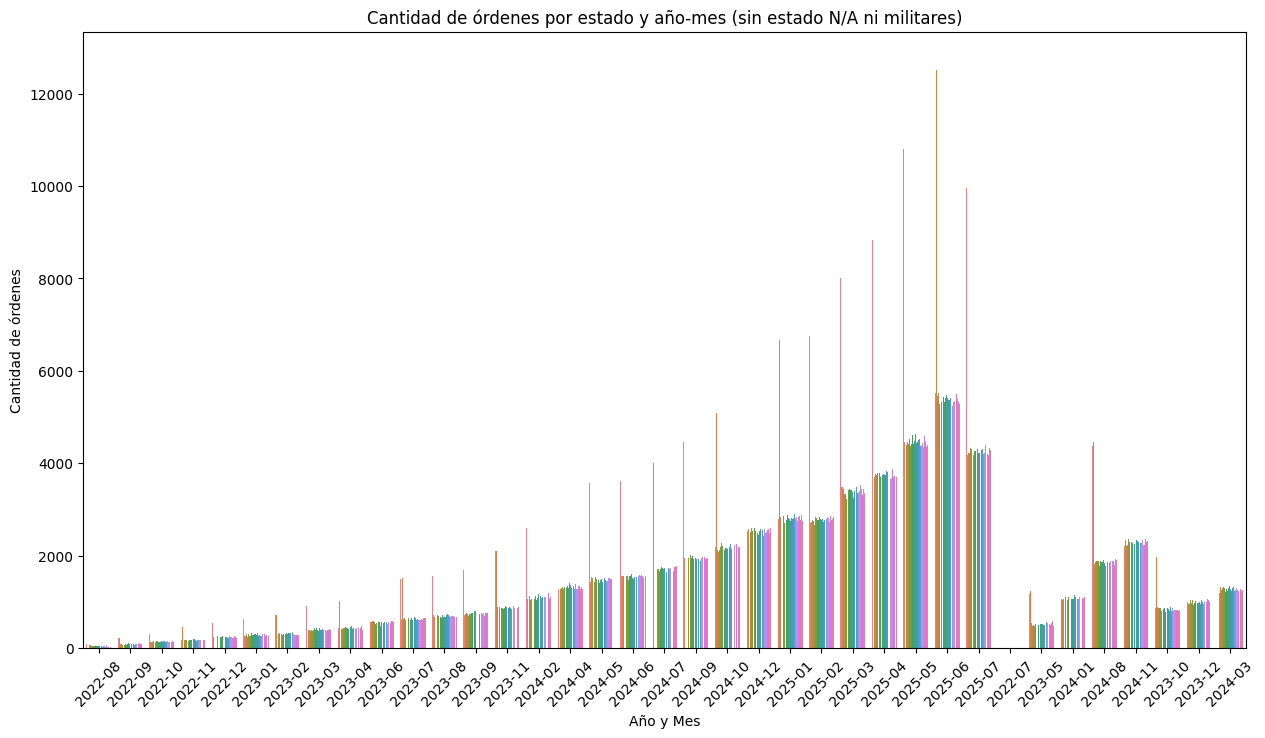

In [34]:
plt.figure(figsize=(15, 8))
sns.barplot(
    data=orders_per_state_year_month.loc[~(
        orders["state"].str.startswith("A")  # Military Americas
        | orders_per_state_year_month["state"].str.contains("N/A")
    )], 
    x="year_month", y="count", hue="state"
    )
plt.title("Cantidad de órdenes por estado y año-mes (sin estado N/A ni militares)")
plt.xlabel("Año y Mes")
plt.xticks(rotation=45)
plt.ylabel("Cantidad de órdenes")
plt.legend([],[], frameon=False)

# Meses ahora aparecen desordenados en el eje X
# Posiblemente sea porque en esos meses sólo había órdenes de estados que fueron filtrados

#### `orders` y `order_items` no están relacionados

In [35]:
order_items = pd.read_csv('data/order_items.csv')
print(
    f"Los order_id en orders estan en el rango \
    [{orders['order_id'].min()}, {orders['order_id'].max()}]"
    )
print(
    f"Los order_id en order_items estan en el rango \
    [{order_items['order_id'].min()}, {order_items['order_id'].max()}]"
    )
print(
    "Los rangos son disjuntos, por lo que no hay order_id en común entre ambos datasets."
    )

Los order_id en orders estan en el rango     [1, 4700000]
Los order_id en order_items estan en el rango     [19900399, 20000000]
Los rangos son disjuntos, por lo que no hay order_id en común entre ambos datasets.
